In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import sys
# define the path where my modules are saved
module_path = 'home/m/m300909/clear sky feedback/'
# add this path tho the system path using the `sys` module
if not module_path in sys.path: sys.path.append(module_path)
# load them as they were regular python packages.
# (the file is called home/m/m300909/py_data_handling.py)
import cir_func as cf
import basic_func as bf
import rad_func as rf

# Load 3D variables

In [3]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['003125x', '00625x', '0125x']#, '025x', '05x', '1x', '2x', '4x', '8x']
#experiment = ['00625x', '1x', '4x']
output_dir = '/newdata/'
model = '_echam6'
file_type = ['_ATM', '_mastrfu', '_tdiag']
time = '_1976_2015'
suffix = '.nc'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

In [4]:
ctrl = {}
ctrl_sf = {}

rotation = ['1/32', '1/16', '1/8']#, '1/4', '1/2', 'Earth-like', '2', '4', '8']
#rotation = ['1/32', '1/16']
#rotation = [ '1/16', 'Earth-like', '4']

for i, rot in enumerate(rotation):
    ctrl[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )

    ctrl_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )

In [5]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_1K = {}
warm_1K_sf = {}

for i, rot in enumerate(rotation):
    warm_1K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )
    
    warm_1K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )


sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_2K = {}
warm_2K_sf= {}

for i, rot in enumerate(rotation):
    warm_2K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )
    
    warm_2K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )


sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_3K = {}
warm_3K_sf= {}

for i, rot in enumerate(rotation):
    warm_3K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
     )
    
    warm_3K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
     )

sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_4K = {}
warm_4K_sf= {}

for i, rot in enumerate(rotation):
    warm_4K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
     )
    
    warm_4K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
     )

In [6]:
data_3D = {
    'ctrl': ctrl, 
    '1K': warm_1K,
    '2K': warm_2K,
    '3K': warm_3K,
    '4K': warm_4K
}

In [7]:
data_mastrfu = {
    'ctrl': ctrl_sf, 
    '1K': warm_1K_sf,
    '2K': warm_2K_sf,
    '3K': warm_3K_sf,
    '4K': warm_4K_sf
}

# Relative humidity

In [12]:


time_slice = slice(19860131.996528,20151231.996528)


parameter_diff = {}

# Baseline (ctrl)
ctrl_rel_hum = bf.dict_to_xarray(data_3D['ctrl'], 'relhum', ('rotation', rotation), time_slice)
parameter_diff['ctrl'] = {
    'relative humidity': {'mean': ctrl_rel_hum.mean(dim=['time', 'lon']) * 100}
}

for key, variable in data_3D.items():
    
    # Cloud field (time mean)
    rel_hum = (
        bf.dict_to_xarray(variable, 'relhum', ('rotation', rotation), time_slice)
    ) * 100
    
    
    if key == 'ctrl':
        rel_hum_pre = rel_hum
        continue
    else:

        rel_hum_diff = rel_hum - rel_hum_pre
        

        # Total change
        rel_hum_diff = rel_hum_diff.mean(dim=['time','lon'])
        
        rel_hum_pre = rel_hum


    parameter_diff.setdefault(key, {})['relative humidity'] = {
        'change': rel_hum_diff,
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

# Mass stream function

In [11]:


time_slice = slice(19860131.996528,20151231.996528)

stream_function = {}
# Baseline (ctrl)
ctrl_mastrfu = bf.dict_to_xarray(data_mastrfu['ctrl'], 'mastrfu', ('rotation', rotation), time_slice)
stream_function['ctrl'] = {
    'mastrfu': {'mean': ctrl_mastrfu.mean(dim=['time', 'lon'])}
}

for ((key, variable), (key_cir, variable_cir)) in zip(data_3D.items(), data_mastrfu.items()):
    
    # Cloud field (time mean)
    mastrfu = (
        bf.dict_to_xarray(variable_cir, 'mastrfu', ('rotation', rotation), time_slice)
    )
    
    
    if key == 'ctrl':
        mastrfu_pre = mastrfu
        continue
    else:

        mastrfu_diff = mastrfu - mastrfu_pre
        

        # Total change
        mastrfu_diff = mastrfu_diff.mean(dim=['time','lon'])
        
        mastrfu_pre = mastrfu


    stream_function.setdefault(key, {})['mastrfu'] = {
        'change': mastrfu_diff,
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

# Cloud fraction

In [60]:


time_slice = slice(19860131.996528,20151231.996528)


parameter_diff = {}

# Baseline (ctrl)
ctrl_cloud = bf.dict_to_xarray(data_3D['ctrl'], 'aclcac', ('rotation', rotation), time_slice)
parameter_diff['ctrl'] = {
    'cloud': {'mean': ctrl_cloud.mean(dim=['time', 'lon'])}
}

for key, variable in data_3D.items():
    
    # Cloud field (time mean)
    cloud = (
        bf.dict_to_xarray(variable, 'aclcac', ('rotation', rotation), time_slice)
    )
    
    
    if key == 'ctrl':
        cloud_pre = cloud
        continue
    else:

        cloud_diff = cloud - cloud_pre
        

        # Total change
        cloud_diff = cloud_diff.mean(dim=['time','lon'])
        
        cloud_pre = cloud


    parameter_diff.setdefault(key, {})['cloud'] = {
        'change': cloud_diff,
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

# Temperature

In [9]:
time_slice = slice(19860131.996528,20151231.996528)

# Precompute control data arrays
st_ctrl = bf.dict_to_xarray(data_3D['ctrl'], 'tpot', ('rotation', rotation), time_slice)

parameter_diff={}
parameter_diff['ctrl'] = {
    'temp': {'mean': st_ctrl.mean(dim=['time', 'lon'])}
}

# Iterate over the data, skipping the 'ctrl' key
for i, (key_atm, data_atm) in enumerate(data_3D.items()):

    # Convert data to xarray
    st = bf.dict_to_xarray(data_atm, 'tpot', ('rotation', rotation),  time_slice)
    w = bf.dict_to_xarray(data_atm, 'var135', ('rotation', rotation),  time_slice)

    if key_atm == 'ctrl':
        st_pre = st
        continue
    else:
        
        st_change = (st - st_pre).mean(dim=['time']) 
        
        
        w = w.mean(dim='time')
        subsidence = bf.subsidence_mask(w, plev=None)
        T_subsidence = st_change.where(subsidence, drop=True)
        
        st_pre = st



    # Store the response and associated color
    parameter_diff.setdefault(key_atm, {})['temp'] = {'change': st_change.mean(dim=['lon']),
                                                      'subsidence region': T_subsidence.mean(dim=['lon'])}


/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

/tmp/ipykernel_3336327/3512407299.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


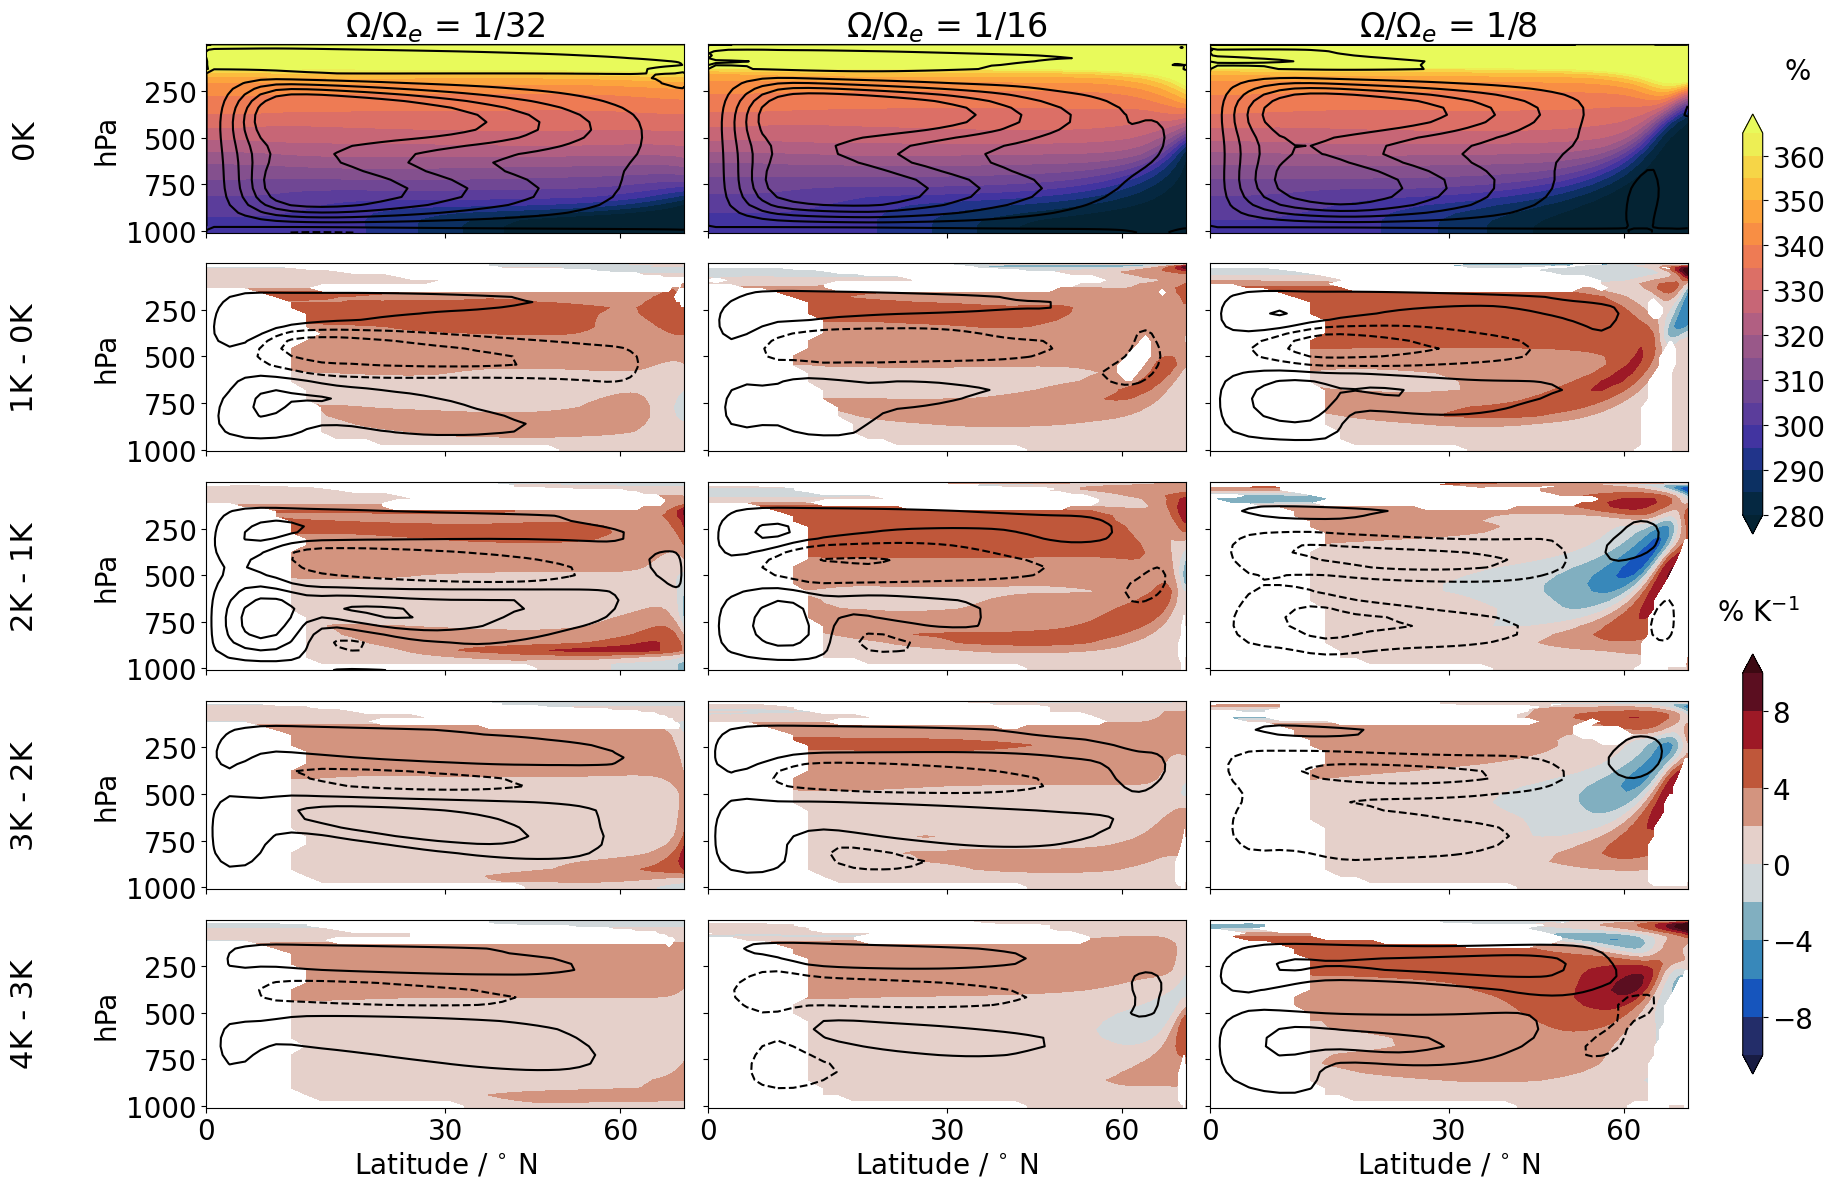

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Constants
cmap =  cmocean.cm.balance #cmocean.cm.tarn #cmocean.cm.balance_r
ticks_deg = np.array([-60, -30, 0, 30, 60])
ticks = np.sin(np.deg2rad(ticks_deg))
y_ticks = np.array([1000, 750, 500, 250])
levels = np.arange(-10, 10.1, 2)#np.arange(-15, 15.5, 1) #np.arange(-0.3, 0.301, 0.05) #
titles = [r'$\Omega/\Omega_e$ = 1/32', r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1/8']
keys = ['ctrl', '1K','2K', '3K', '4K']
label_text = ['0K', '1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 12), sharex='col', sharey='row')
axis = axes.ravel()

cmap2 =  cmocean.cm.thermal #cmocean.cm.deep #cmocean.cm.dense
levels2 = np.arange(280, 370, 5) #np.arange(0, 100, 10) #np.arange(0, 1, 0.1) #

interval = np.arange(-5e11, 5e11, 1e11)
interval_diff = np.arange(-20e10, 20.1e10, 3e10)


def plot_data(ax, z, cmap, levels, title=None, set_ylabel=False, set_xlabel=False):
    x = np.sin(np.deg2rad(z.lat))
    y = z.plev / 100
    x, y = np.meshgrid(x, y)
    
    if cmap == None:
        cont = ax.contour(x, y, z, colors='k', levels=levels)
        ax.invert_yaxis()
    else:
        cont = ax.contourf(x, y, z, cmap=cmap, levels=levels, extend='both')
    
    if set_ylabel:
        ax.set_ylabel('hPa', size=20)
        
        ax.yaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_ticks(y_ticks)
        ax.set_yticklabels(y_ticks)
    
    if title:
        ax.set_title(title, size=24)
    
    if set_xlabel:
        ax.xaxis.set_tick_params(labelsize=20)
        ax.xaxis.set_ticks(ticks)
        ax.set_xticklabels(ticks_deg)
        ax.set_xlim(0, np.sin(np.deg2rad(z.lat[0])))
        ax.set_xlabel('Latitude / $^{\circ}$ N', size=20)
    
    return cont

# Plot each subplot
c = 0
mean_cont = None
for i, ax in enumerate(axis):
    if i % 3 == 0:
        z = parameter_diff[keys[c]]['temp']['mean' if i < 3 else 'subsidence region'].sel(rotation='1/32')
        z2 = stream_function[keys[c]]['mastrfu']['mean' if i < 3 else 'change'].sel(rotation='1/32')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[0] if i < 3 else None, set_ylabel=True)
        cont_line = plot_data(ax, z2, None, interval if i < 3 else interval_diff, title=titles[0] if i < 3 else None, set_ylabel=True)
        if i < 3:
            mean_cont = cont
    elif i % 3 == 1:
        z = parameter_diff[keys[c]]['temp']['mean' if i < 3 else 'subsidence region'].sel(rotation='1/16')
        z2 = stream_function[keys[c]]['mastrfu']['mean' if i < 3 else 'change'].sel(rotation='1/16')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[1] if i < 3 else None)
        cont_line = plot_data(ax, z2, None, interval if i < 3 else interval_diff, title=titles[1] if i < 3 else None)
        if i < 3:
            mean_cont = cont
    else:
        z = parameter_diff[keys[c]]['temp']['mean' if i < 3 else 'subsidence region'].sel(rotation='1/8')
        z2 = stream_function[keys[c]]['mastrfu']['mean' if i < 3 else 'change'].sel(rotation='1/8')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[2] if i < 3 else None)
        cont_line = plot_data(ax, z2, None, interval if i < 3 else interval_diff, title=titles[2] if i < 3 else None)
        if i < 3:
            mean_cont = cont
        c += 1
    
    if i >= 12:
        plot_data(ax, z, cmap, levels, set_xlabel=True)

# Add labels to the left side of each row
for i, ax in enumerate(axes[:, 0]):  # Iterate over the first column of axes
    ax.text(-0.35, 0.5, label_text[i], transform=ax.transAxes, fontsize=22, va='center', ha='right', rotation=90)

cbar_mean = fig.add_axes([0.87, 0.55, 0.01, 0.35])  # [left, bottom, width, height]
cbar1 = fig.colorbar(mean_cont, cax=cbar_mean, shrink=0.7, pad=0.04, aspect=30)
cbar_mean.tick_params(labelsize=20)
cbar1.set_label('%', rotation=0, fontsize=20, labelpad=-20, y=1.2)

cbar_change = fig.add_axes([0.87, 0.1, 0.01, 0.35])
cbar2 = fig.colorbar(cont, cax=cbar_change, shrink=0.5, pad=0.04, aspect=30)
cbar_change.tick_params(labelsize=20)
cbar2.set_label('% K$^{-1}$', rotation=0, fontsize=20, labelpad=-40, y=1.2)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()